In [1]:
import os
if os.name != 'posix':
    %matplotlib ipympl
else:
    %matplotlib notebook
import scipy.constants as sc
from scipy.optimize import fsolve

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.measurement as mse

28374
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
import pylib.qsvt_angles as qsvt_a
display(HTML("<style>.container { width:100% !important; }</style>"))

colors_ = ["blue", "red", "green", "gray", "black"]

from matplotlib import ticker
cmap_two_signs_= 'coolwarm'
cmap_two_signs_= 'Blues'
# cmap_two_signs_= 'Greys'
# cmap_two_signs_= 'Pastel1'
# cmap_two_signs_= 'flag'
# cmap_two_signs_= 'nipy_spectral'
# cmap_two_signs_= 'jet'
# cmap_two_signs_= 'seismic'
def fmt_(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

for i in range(10):
    plt.close()

In [3]:
# --- Read coefficients ---
mix.reload_module(mix)
mix.reload_module(qsvt_a)

# path_coefs_ = "../QuCF/tests/compute-angles/LCHS_weights/coefs/"
# filename_ = "kmax_80/sqrt_inv_arcsin2_80.000000_5"


# path_coefs_ = "../simulations/KIN1D1D/vH-angles/"
# filename_ = "vH_-0.006045_11"

path_coefs_ = "../simulations/KIN1D1D/init-angles/"
filename_ = "ase-init_0.332277_6"

data = qsvt_a.read_Fourier_coefs(path_coefs_, filename_)

when simulated:  12-28-2023 15:42:27

function-type: 		ase-init
function-parity: 		0
param: 			0.332277
absolute error: 	1.543e-06
norm. factor: 		1.000e+00
number of coefficients: 115


<IPython.core.display.Javascript object>


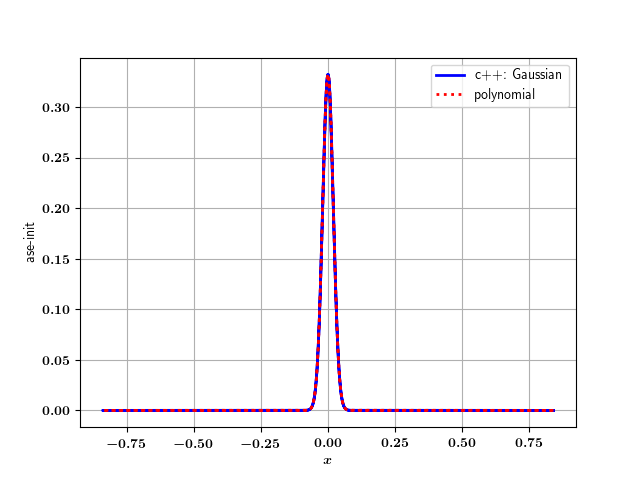

In [4]:
# --------------------------------------------------------
# --- Plot the function restored from the coefficients ---
# --------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(qsvt_a)

fig = plt.figure()
ax = fig.add_subplot(111)

# ax.plot(data["x"], F_x_gauss(data["x"], data["param"], data["factor_norm"]), 
#         color='b',  linewidth = 2, linestyle='-', label = "py")
ax.plot(data["x"], data["orig_func"], color='blue',       linewidth = 2, linestyle='-', label = "c++: Gaussian")
ax.plot(data["x"], data["ref_funct"], color='r',  linewidth = 2, linestyle=':',  label = "polynomial")

plt.xlabel('$x$')
plt.ylabel(data["function_type"])
ax.legend()
plt.grid(True)
plt.show()